In [2]:
pip install scanpy

Note: you may need to restart the kernel to use updated packages.


Loading combined dataset...
Loaded dataset with 1388 samples and 40926 genes

Sample metadata - first 5 rows:


,sample_id,subject_id,dataset,data_type,expression_unit,tissue,sex,age
002_S_0413_002_S_0413_gencode_v24_pruned,002_S_0413_002_S_0413_gencode_v24_pruned,002_S_0413,adni,Microarray,Normalized intensity,blood,unknown,
002_S_0729_002_S_0729_gencode_v24_pruned,002_S_0729_002_S_0729_gencode_v24_pruned,002_S_0729,adni,Microarray,Normalized intensity,blood,unknown,
002_S_1155_002_S_1155_gencode_v24_pruned,002_S_1155_002_S_1155_gencode_v24_pruned,002_S_1155,adni,Microarray,Normalized intensity,blood,unknown,
002_S_1261_002_S_1261_gencode_v24_pruned,002_S_1261_002_S_1261_gencode_v24_pruned,002_S_1261,adni,Microarray,Normalized intensity,blood,unknown,
002_S_1268_002_S_1268_gencode_v24_pruned,002_S_1268_002_S_1268_gencode_v24_pruned,002_S_1268,adni,Microarray,Normalized intensity,blood,unknown,



Dataset distribution:
  mage: 731 samples (52.7%)
  adni: 650 samples (46.8%)
  encode: 7 samples (0.5%)

Tissue distribution (top 10):
  lymphoblast: 731 samples (52.7%)
  blood: 650 samples (46.8%)
  lung: 2 samples (0.1%)
  bone marrow: 1 samples (0.1%)
  liver: 1 samples (0.1%)
  kidney: 1 samples (0.1%)
  pancreas: 1 samples (0.1%)
  skin: 1 samples (0.1%)

Gene ID analysis:
  Ensembl IDs: 40681 (99.4%)
  Entrez IDs: 0 (0.0%)
  Spike-in IDs: 21 (0.1%)
  Other IDs: 224 (0.5%)

Gene metadata - first 5 rows:


,gene_id,present_in_datasets,chromosome,mapping_source,gene_name,original_ids,gene_type
ENSG00000000003,ENSG00000000003,"adni,mage",chrX,reference_mapping,TSPAN6,ENSG00000000003,protein_coding
ENSG00000000005,ENSG00000000005,adni,chrX,reference_mapping,TNMD,ENSG00000000005,protein_coding
ENSG00000000419,ENSG00000000419,"adni,mage",chr20,reference_mapping,DPM1,ENSG00000000419,protein_coding
ENSG00000000457,ENSG00000000457,"adni,encode,mage",chr1,reference_mapping,SCYL3,ENSG00000000457,protein_coding
ENSG00000000460,ENSG00000000460,"encode,mage",chr1,reference_mapping,C1orf112,ENSG00000000460,protein_coding



Gene presence by dataset:
  mage: 19428 genes (47.5%)
  adni: 17991 genes (44.0%)
  encode: 34792 genes (85.0%)

Creating dataset overlap visualization...


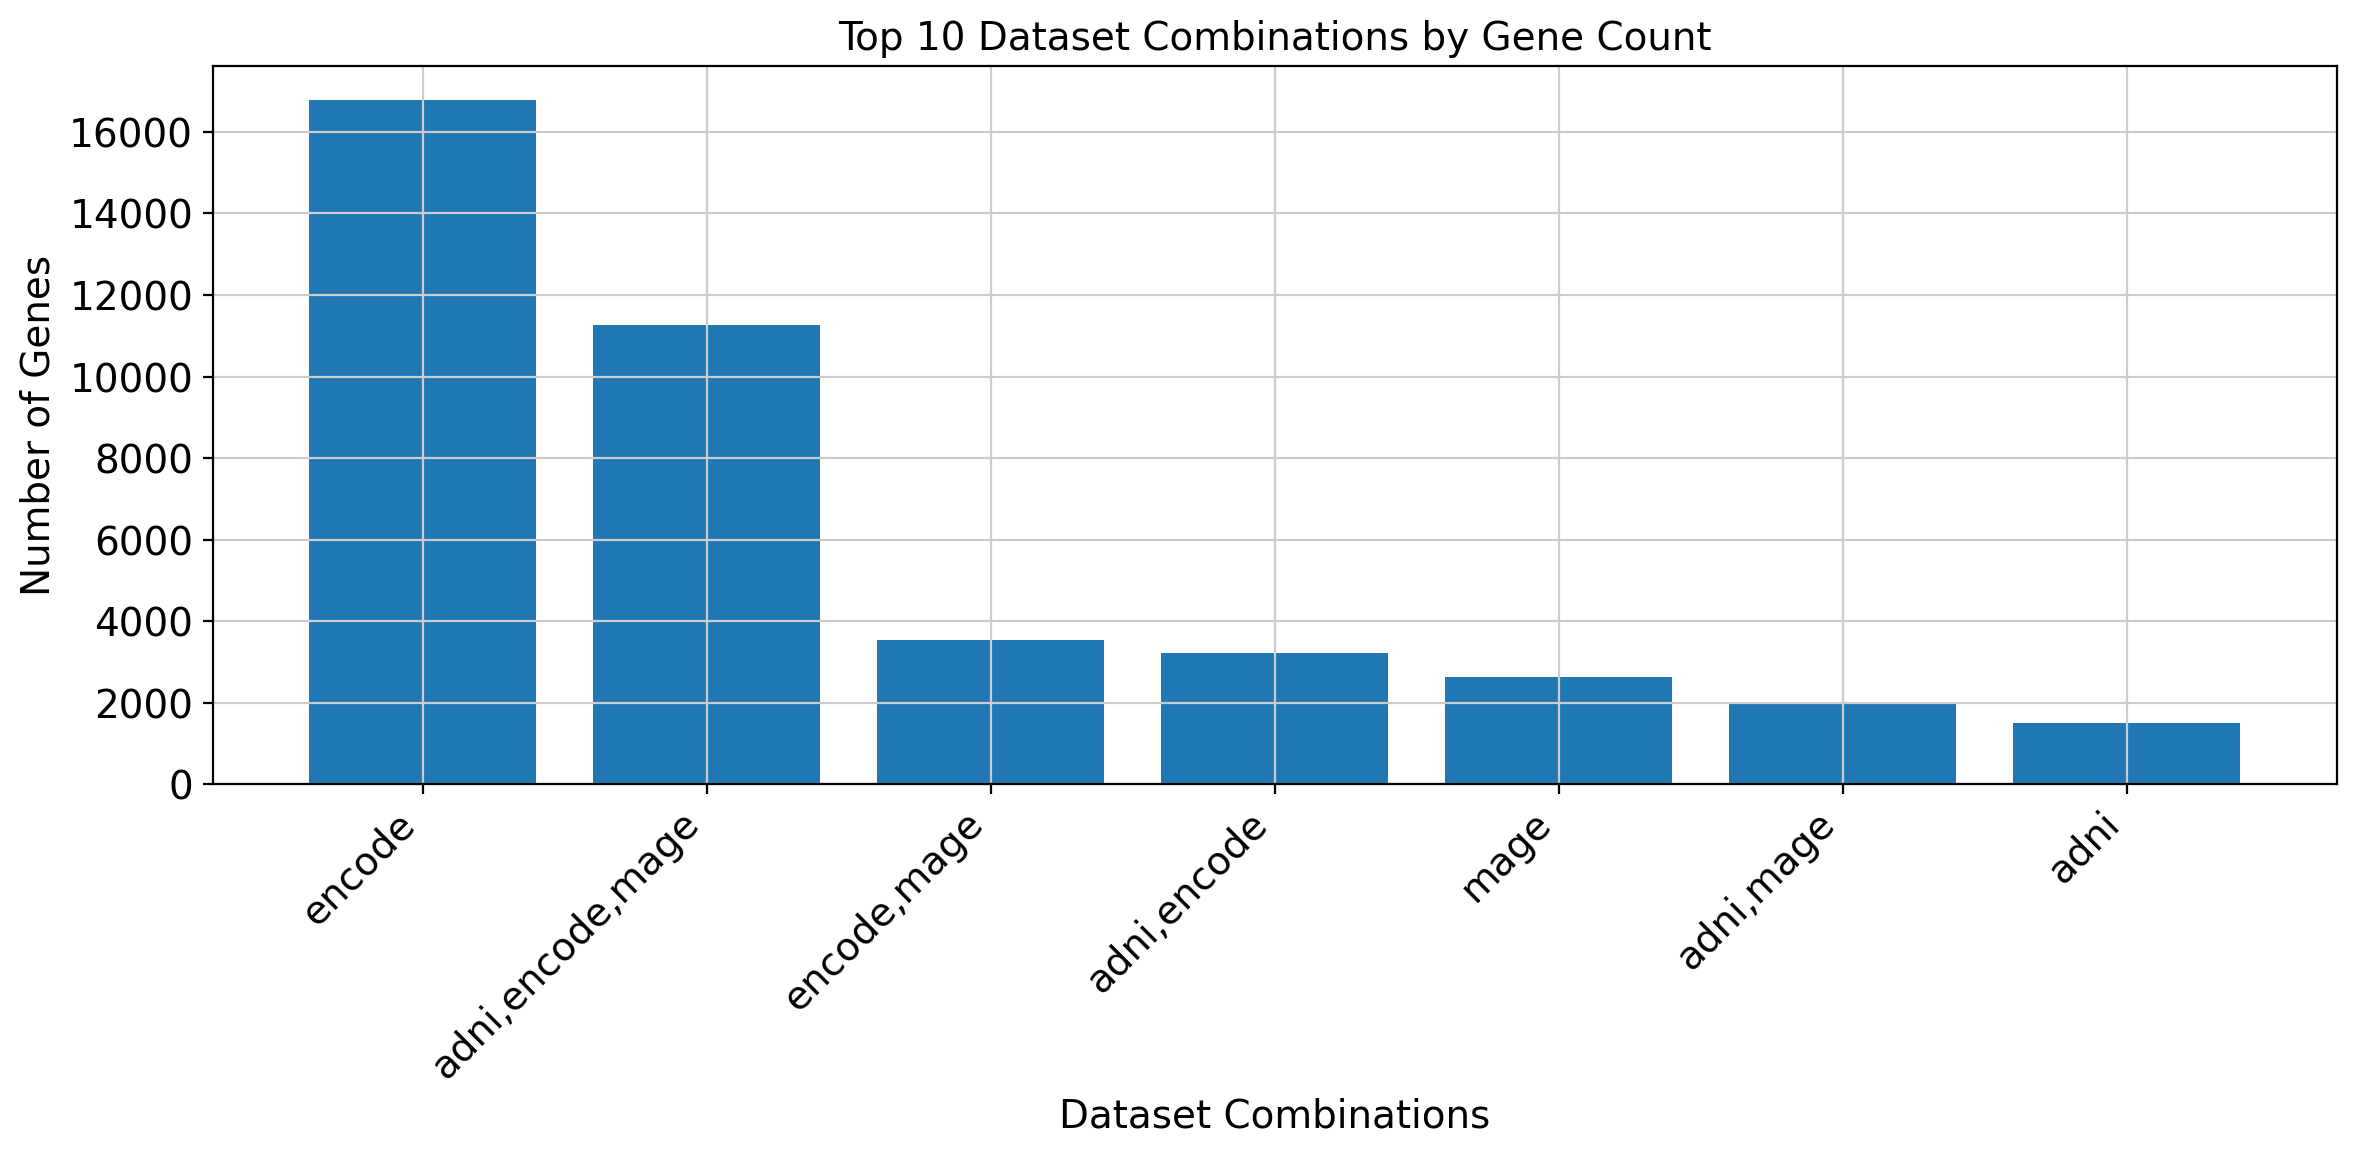


Creating UMAP visualization...
Subsetting to 1000 samples from 1388 for faster visualization


/mnt/czi-sci-ai/intrinsic-variation-gene-ex/enformer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


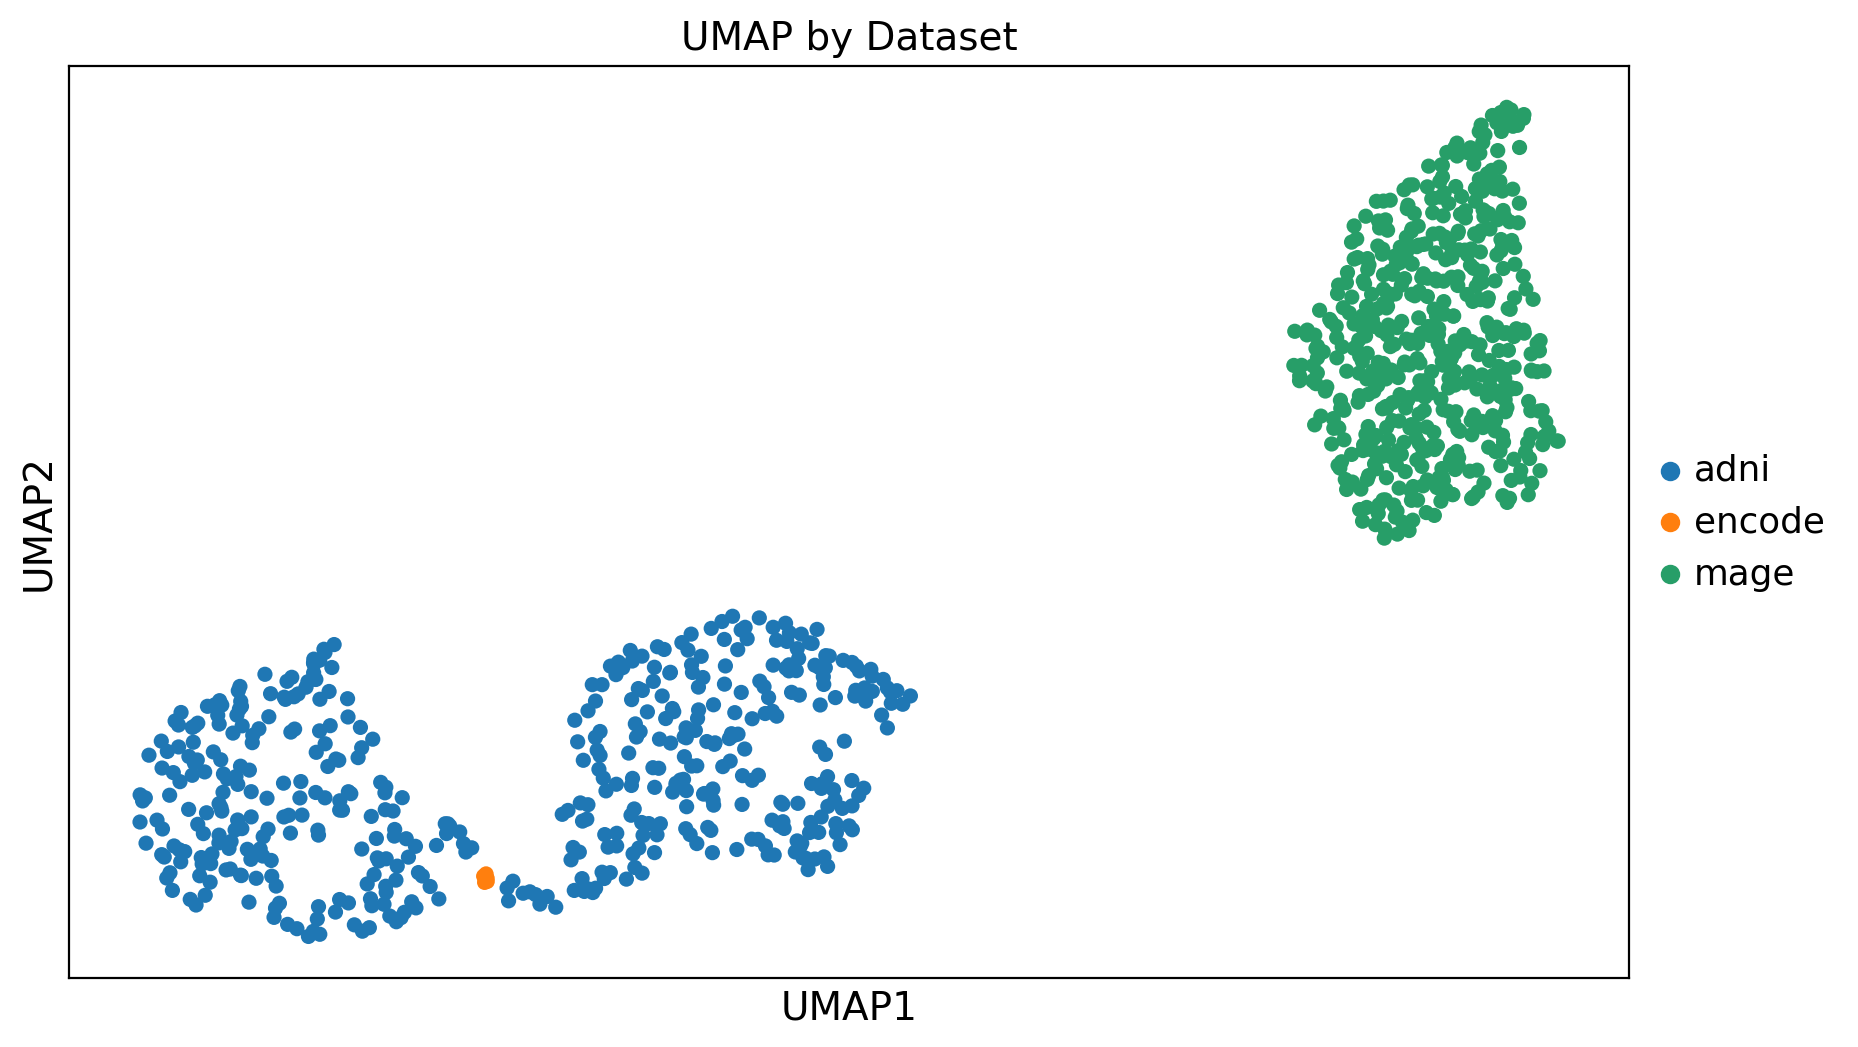

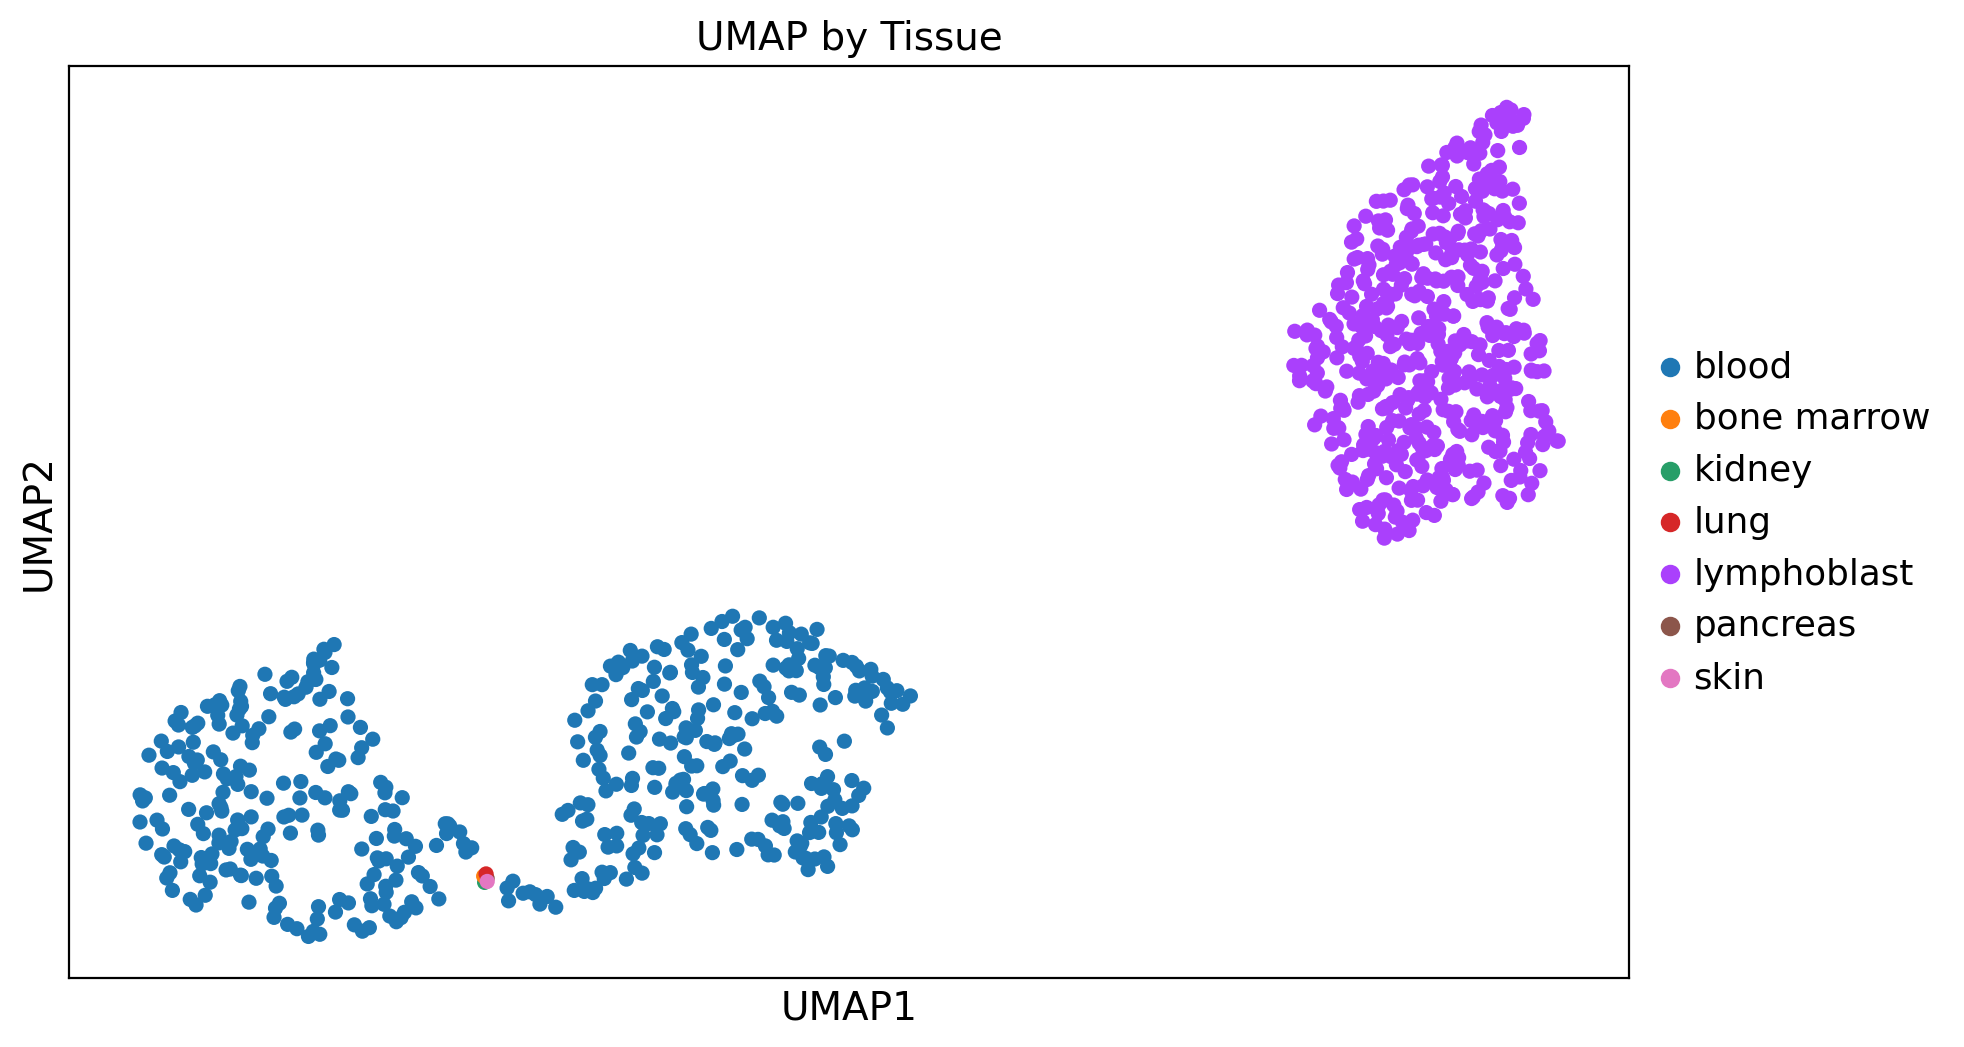

Analysis complete!


In [8]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Set plotting style
sc.settings.set_figure_params(dpi=100, facecolor='white')
plt.rcParams['figure.figsize'] = (10, 6)

# Base paths
BASE_DIR = "/mnt/czi-sci-ai/intrinsic-variation-gene-ex/rnaseq"
LATEST_RUN = f"{BASE_DIR}/standardized_data/latest_no_gtex"
COMBINED_FILE = f"{LATEST_RUN}/combined_all_genes_sparse_standardized.h5ad"

# Load the combined dataset
print("Loading combined dataset...")
adata = sc.read_h5ad(COMBINED_FILE)
print(f"Loaded dataset with {adata.n_obs} samples and {adata.n_vars} genes")

# Examine the obs (sample metadata)
print("\nSample metadata - first 5 rows:")
display(adata.obs.head())

# Summarize dataset distribution
print("\nDataset distribution:")
dataset_counts = adata.obs['dataset'].value_counts()
for dataset, count in dataset_counts.items():
    print(f"  {dataset}: {count} samples ({count/adata.n_obs*100:.1f}%)")

# Examine tissue distribution
if 'tissue' in adata.obs.columns:
    print("\nTissue distribution (top 10):")
    tissue_counts = adata.obs['tissue'].value_counts().head(10)
    for tissue, count in tissue_counts.items():
        print(f"  {tissue}: {count} samples ({count/adata.n_obs*100:.1f}%)")

# Examine gene IDs
print("\nGene ID analysis:")
ensembl_count = sum(1 for id in adata.var_names if str(id).startswith('ENSG'))
entrez_count = sum(1 for id in adata.var_names if str(id).startswith('ENTREZ:'))
spikein_count = sum(1 for id in adata.var_names if str(id).startswith('gSpikein'))
other_count = adata.n_vars - ensembl_count - entrez_count - spikein_count

print(f"  Ensembl IDs: {ensembl_count} ({ensembl_count/adata.n_vars*100:.1f}%)")
print(f"  Entrez IDs: {entrez_count} ({entrez_count/adata.n_vars*100:.1f}%)")
print(f"  Spike-in IDs: {spikein_count} ({spikein_count/adata.n_vars*100:.1f}%)")
print(f"  Other IDs: {other_count} ({other_count/adata.n_vars*100:.1f}%)")

# Examine the var metadata
print("\nGene metadata - first 5 rows:")
display(adata.var.head())

# Check present_in_datasets column
if 'present_in_datasets' in adata.var.columns:
    print("\nGene presence by dataset:")
    for dataset in dataset_counts.index:
        dataset_genes = sum(1 for x in adata.var['present_in_datasets'] if dataset in str(x))
        print(f"  {dataset}: {dataset_genes} genes ({dataset_genes/adata.n_vars*100:.1f}%)")

# Create a visualization of dataset overlap
if 'present_in_datasets' in adata.var.columns:
    print("\nCreating dataset overlap visualization...")
    
    # Count genes present in each dataset combination
    dataset_combinations = {}
    for presence in adata.var['present_in_datasets']:
        presence_str = str(presence)
        if presence_str not in dataset_combinations:
            dataset_combinations[presence_str] = 0
        dataset_combinations[presence_str] += 1
    
    # Sort by count and plot the top 10
    sorted_combinations = sorted(dataset_combinations.items(), key=lambda x: x[1], reverse=True)
    top_combinations = sorted_combinations[:10]
    
    plt.figure(figsize=(12, 6))
    labels = [combo[0] if len(combo[0]) < 20 else combo[0][:17]+'...' for combo in top_combinations]
    values = [combo[1] for combo in top_combinations]
    
    plt.bar(labels, values)
    plt.title('Top 10 Dataset Combinations by Gene Count')
    plt.xlabel('Dataset Combinations')
    plt.ylabel('Number of Genes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Create a UMAP visualization colored by dataset
print("\nCreating UMAP visualization...")

# Take a subset for faster processing if needed
if adata.n_obs > 1000:
    print(f"Subsetting to 1000 samples from {adata.n_obs} for faster visualization")
    sc.pp.subsample(adata, n_obs=1000)

# Normalize and scale the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.pp.pca(adata, n_comps=30)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

# Plot UMAP by dataset
sc.pl.umap(adata, color='dataset', title='UMAP by Dataset')

# Plot UMAP by tissue if available
if 'tissue' in adata.obs.columns:
    sc.pl.umap(adata, color='tissue', title='UMAP by Tissue')

print("Analysis complete!")

In [9]:
# Dataset distribution
print("\n=== DATASET DISTRIBUTION ===")
dataset_counts = adata.obs['dataset'].value_counts()
dataset_counts


=== DATASET DISTRIBUTION ===


dataset
mage      520
adni      475
encode      5
Name: count, dtype: int64

In [ ]:
# Examine tissue distribution
print("\n=== TISSUE DISTRIBUTION ===")
tissue_counts = adata.obs['tissue'].value_counts().head(15)
tissue_counts


: 

In [2]:
# Cell 1: Import libraries and define paths
import scanpy as sc
import pandas as pd
import os
import warnings

# Ignore specific warnings often encountered with AnnData
warnings.filterwarnings("ignore", category=FutureWarning, module="anndata")

# Define the paths provided by the user
BASE_DIR = "/mnt/czi-sci-ai/intrinsic-variation-gene-ex/rnaseq"
# --- IMPORTANT: Using the path your partner mentioned ---
LATEST_RUN_DIR = f"{BASE_DIR}/standardized_data/latest_no_gtex"
COMBINED_FILE_PATH = f"{LATEST_RUN_DIR}/combined_all_genes_sparse_standardized.h5ad"

print(f"Base Directory: {BASE_DIR}")
print(f"Looking in Run Directory: {LATEST_RUN_DIR}")
print(f"Attempting to load file: {COMBINED_FILE_PATH}")

# Check if the directory and file exist
if not os.path.exists(LATEST_RUN_DIR):
    print(f"\nWARNING: Directory '{LATEST_RUN_DIR}' does not exist!")
elif not os.path.exists(COMBINED_FILE_PATH):
    print(f"\nWARNING: File '{COMBINED_FILE_PATH}' does not exist in the specified directory!")
else:
    print(f"\nFile found at: {COMBINED_FILE_PATH}")

# Check if LATEST_RUN_DIR is a symlink and where it points
if os.path.islink(LATEST_RUN_DIR):
    target_dir = os.readlink(LATEST_RUN_DIR)
    print(f"'{os.path.basename(LATEST_RUN_DIR)}' is a symlink pointing to: {target_dir}")
else:
    print(f"'{os.path.basename(LATEST_RUN_DIR)}' is a regular directory.")

Base Directory: /mnt/czi-sci-ai/intrinsic-variation-gene-ex/rnaseq
Looking in Run Directory: /mnt/czi-sci-ai/intrinsic-variation-gene-ex/rnaseq/standardized_data/latest_no_gtex
Attempting to load file: /mnt/czi-sci-ai/intrinsic-variation-gene-ex/rnaseq/standardized_data/latest_no_gtex/combined_all_genes_sparse_standardized.h5ad

File found at: /mnt/czi-sci-ai/intrinsic-variation-gene-ex/rnaseq/standardized_data/latest_no_gtex/combined_all_genes_sparse_standardized.h5ad
'latest_no_gtex' is a symlink pointing to: /mnt/czi-sci-ai/intrinsic-variation-gene-ex/rnaseq/standardized_data/run_no_gtex_20250430_212747


In [3]:
# Cell 2: Load the AnnData object
adata = None
try:
    adata = sc.read_h5ad(COMBINED_FILE_PATH)
    print(f"Successfully loaded AnnData object.")
    print(f"Shape: {adata.shape} (Samples, Genes)")
except FileNotFoundError:
    print(f"ERROR: File not found at {COMBINED_FILE_PATH}. Please verify the path.")
except Exception as e:
    print(f"ERROR: Could not load AnnData file: {e}")

Successfully loaded AnnData object.
Shape: (1388, 40926) (Samples, Genes)


In [4]:
# Cell 3: Examine the .obs DataFrame - First few rows and columns
if adata:
    print("First 5 rows of adata.obs:")
    display(adata.obs.head()) # display() works better in notebooks for DataFrames

    print("\nColumns in adata.obs:")
    print(list(adata.obs.columns))
else:
    print("AnnData object not loaded.")

First 5 rows of adata.obs:


,sample_id,subject_id,dataset,data_type,expression_unit,tissue,sex,age
002_S_0413_002_S_0413_gencode_v24_pruned,002_S_0413_002_S_0413_gencode_v24_pruned,002_S_0413,adni,Microarray,Normalized intensity,blood,unknown,
002_S_0729_002_S_0729_gencode_v24_pruned,002_S_0729_002_S_0729_gencode_v24_pruned,002_S_0729,adni,Microarray,Normalized intensity,blood,unknown,
002_S_1155_002_S_1155_gencode_v24_pruned,002_S_1155_002_S_1155_gencode_v24_pruned,002_S_1155,adni,Microarray,Normalized intensity,blood,unknown,
002_S_1261_002_S_1261_gencode_v24_pruned,002_S_1261_002_S_1261_gencode_v24_pruned,002_S_1261,adni,Microarray,Normalized intensity,blood,unknown,
002_S_1268_002_S_1268_gencode_v24_pruned,002_S_1268_002_S_1268_gencode_v24_pruned,002_S_1268,adni,Microarray,Normalized intensity,blood,unknown,



Columns in adata.obs:
['sample_id', 'subject_id', 'dataset', 'data_type', 'expression_unit', 'tissue', 'sex', 'age']


In [5]:
# Cell 4: Check the crucial 'dataset' column value counts
if adata:
    if 'dataset' in adata.obs.columns:
        print("\nValue counts for the 'dataset' column:")
        dataset_counts = adata.obs['dataset'].value_counts()
        print(dataset_counts)

        # Check specifically if 'encode' is present
        if 'encode' in dataset_counts.index:
            print(f"\nConfirmed: Found {dataset_counts['encode']} samples labeled as 'encode'.")
        else:
            print(f"\nWARNING: No samples found with 'encode' in the 'dataset' column!")

        # Check specifically if 'entex' is present
        if 'entex' in dataset_counts.index:
             print(f"\nNOTE: Found {dataset_counts['entex']} samples labeled as 'entex'.")
        else:
             print(f"\nConfirmed: No samples found with 'entex' in the 'dataset' column.")

    else:
        print("\nERROR: 'dataset' column not found in adata.obs!")
else:
    print("AnnData object not loaded.")


Value counts for the 'dataset' column:
dataset
mage      731
adni      650
encode      7
Name: count, dtype: int64

Confirmed: Found 7 samples labeled as 'encode'.

Confirmed: No samples found with 'entex' in the 'dataset' column.


In [6]:
# Cell 5: Examine the 'subject_id' column
if adata:
    if 'subject_id' in adata.obs.columns:
        print("\nUnique values sample for 'subject_id' column (first 20):")
        unique_subjects = adata.obs['subject_id'].unique()
        print(unique_subjects[:20])
        print(f"(Total unique subject_ids: {len(unique_subjects)})")

        # Check format - do they look like ENCDO*?
        if all(str(s).startswith('ENCDO') for s in unique_subjects[:5] if pd.notna(s)):
             print("\nSubject IDs appear to follow the ENCDO* format.")

    else:
        print("\nERROR: 'subject_id' column not found in adata.obs!")
else:
    print("AnnData object not loaded.")


Unique values sample for 'subject_id' column (first 20):
['002_S_0413' '002_S_0729' '002_S_1155' '002_S_1261' '002_S_1268'
 '002_S_1280' '002_S_2043' '002_S_2073' '002_S_4171' '002_S_4213'
 '002_S_4219' '002_S_4225' '002_S_4229' '002_S_4251' '002_S_4270'
 '002_S_4447' '002_S_4473' '002_S_4521' '003_S_0907' '003_S_0908']
(Total unique subject_ids: 1388)


In [7]:
# Cell 6: Cross-reference 'dataset' and 'subject_id' specifically for 'encode' samples
if adata:
    if 'dataset' in adata.obs.columns and 'subject_id' in adata.obs.columns:
        encode_samples_obs = adata.obs[adata.obs['dataset'] == 'encode']

        if not encode_samples_obs.empty:
            print(f"\nSubject IDs for the {len(encode_samples_obs)} samples where dataset == 'encode':")
            print(list(encode_samples_obs['subject_id'].unique()))

            # Compare with the expected ENCODE cell line subject IDs from the image
            expected_encode_subjects = [
                "ENCDO451RUA", "ENCDO869AAI", "ENCDO467QPX",
                "ENCDO886MPB", "ENCDO000AAL", "ENCDO105AAA", "ENCDO845WKR"
            ]
            print("\nExpected ENCODE cell line subject IDs:")
            print(expected_encode_subjects)

            if set(encode_samples_obs['subject_id'].unique()) == set(expected_encode_subjects):
                print("\nMatch confirmed: Subject IDs for 'encode' samples match expected cell line donor IDs.")
            else:
                print("\nWARNING: Subject IDs for 'encode' samples DO NOT match expected cell line donor IDs.")

        else:
            print("\nNo samples found where dataset == 'encode'.")
    else:
        print("\nCould not perform cross-reference: 'dataset' or 'subject_id' column missing.")
else:
    print("AnnData object not loaded.")


Subject IDs for the 7 samples where dataset == 'encode':
['ENCDO451RUA', 'ENCDO869AAI', 'ENCDO467QPX', 'ENCDO886MPB', 'ENCDO000AAL', 'ENCDO105AAA', 'ENCDO845WKR']

Expected ENCODE cell line subject IDs:
['ENCDO451RUA', 'ENCDO869AAI', 'ENCDO467QPX', 'ENCDO886MPB', 'ENCDO000AAL', 'ENCDO105AAA', 'ENCDO845WKR']

Match confirmed: Subject IDs for 'encode' samples match expected cell line donor IDs.
